  # **CDF to Calculate Probabilities (Practice)** :

- Haouari Ahmed Anas

- 10/02/2024

# Importing :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/weight-height male-female - weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Separate Data :

In [ ]:
males = df.loc[df['Gender'] == 'Male'].copy()
females = df.loc[df['Gender'] == 'Female'].copy()

# Question1 : Probability that a female's height is between 55.0 and 56.0 inches.

In [ ]:
def proba(dataframe, low, high) :
  data = dataframe['Height']
  mean = np.mean(data)
  std = np.std(data)

  fig,axes = plt.subplots(2, 1, figsize=(14,6))
  sns.histplot(x=data, stat='density',kde=True, ax=axes[0])
  axes[0].set_title('Distribution Height')
  axes[0].axvline(low, color= 'red')
  axes[0].axvline(high, color ='red')
  axes[0].axvspan(low, high, color ='red', alpha=0.3, zorder = 0);

  min_val = np.min(data)
  max_val = np.max(data)
  range_vals = np.linspace(min_val, max_val,1000)
  pdf = stats.norm.pdf(range_vals,loc=mean,scale=std)

  sns.histplot(x=data, fill=False,stat='density',ax=axes[1])
  axes[1].plot(range_vals,pdf,label='Calculated PDF')
  axes[1].axvline(low,color='red',ls='--')
  axes[1].axvline(high,color='red',ls='--')
  axes[1].fill_between(range_vals,pdf, where=(range_vals>low)&(range_vals<high),
                  color='red', label='Probability to Calculate')

  result = (stats.norm.cdf(high, loc=mean,scale=std) - stats.norm.cdf(low, loc=mean, scale=std)) * 100
  print(f"Probability is equal to: {result:.2f} %.")

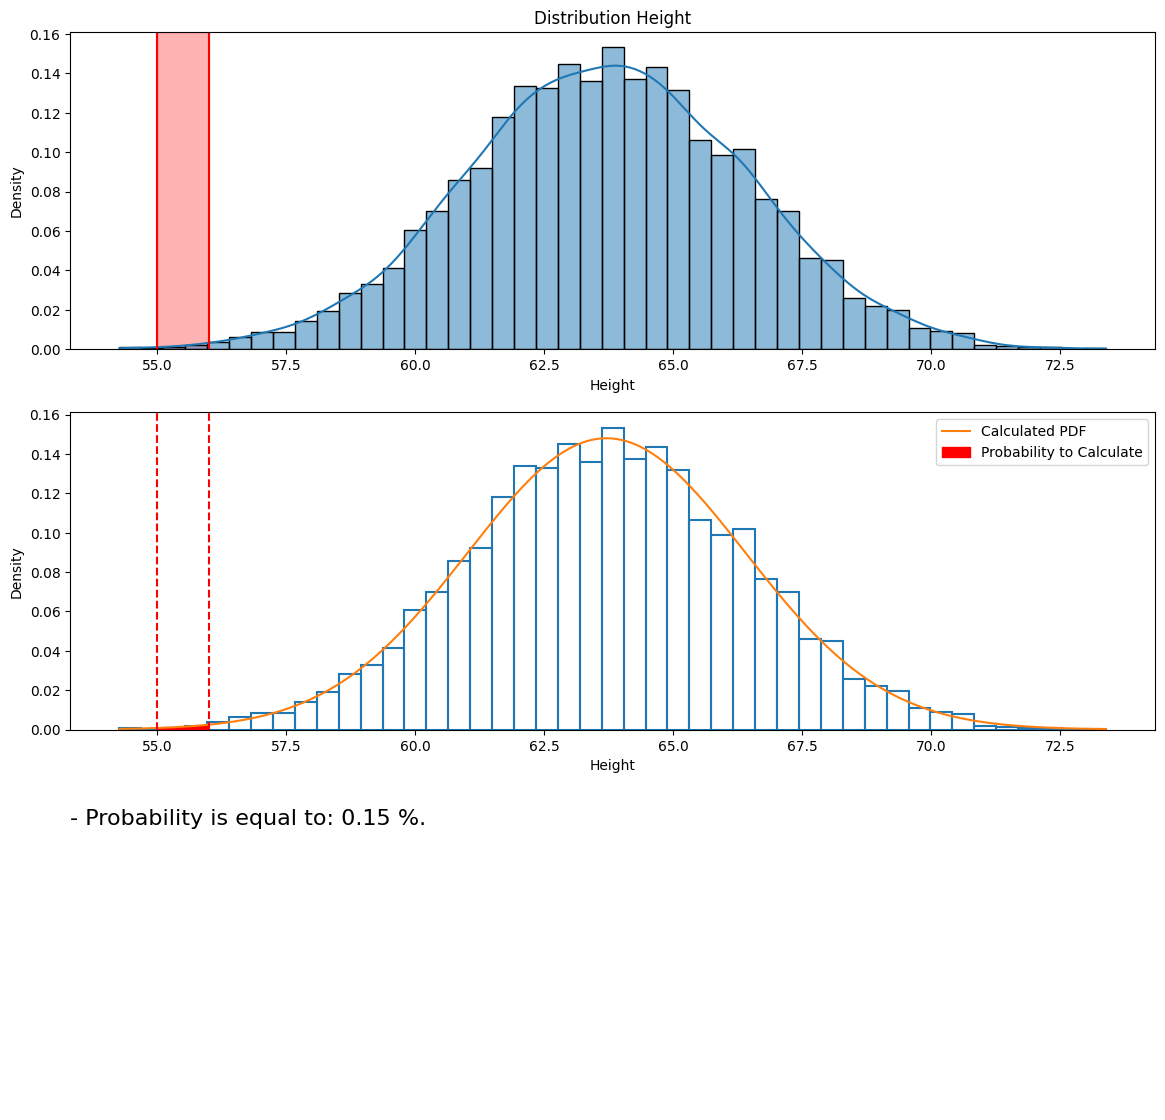

In [ ]:
proba(females, 55, 56)

# Question 2 : Probability that a female's height is less than 5 feet (60 in)

Probability is equal to: 8.42 %.


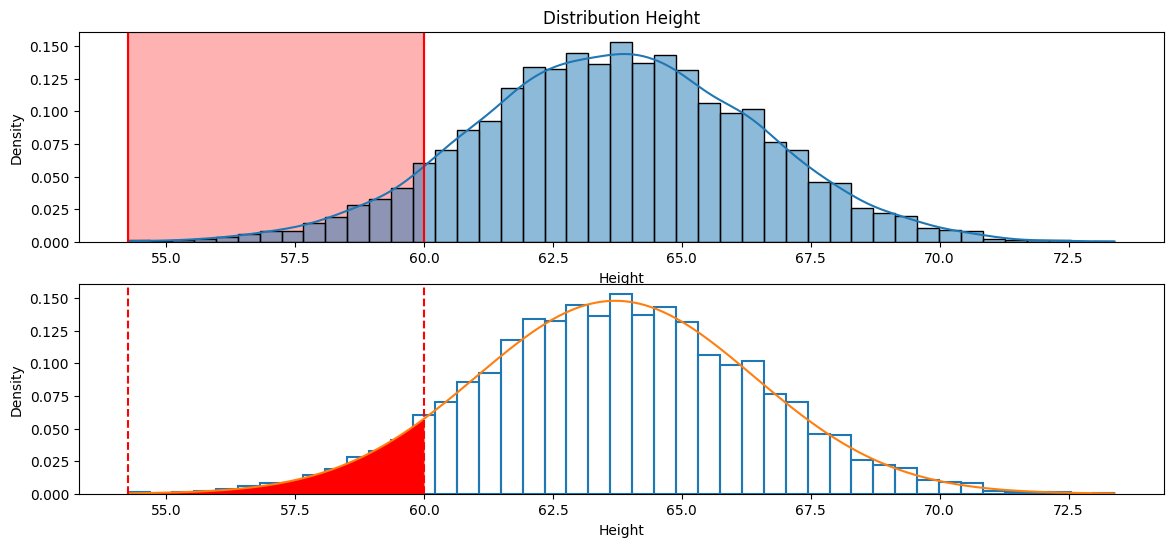

In [ ]:
proba(females, np.min(females['Height']), 60)

# Question 3 : Probability that a female's height is greater than the mean:

The probabality that a female's height is greater than the mean is equal to 50%.